
# Experiments with PDFA Learning

The goal of the notebook is to experiment with manipulating and learning pdfa.

Change up to the main repo directory:

In [1]:
import os
os.chdir(os.path.join('..', '..'))

In [2]:
%load_ext autoreload
%autoreload 2
import IPython
import numpy as np
from pygments import highlight
from pygments.lexers import YamlLexer
from pygments.formatters import HtmlFormatter
from sklearn.model_selection import train_test_split

from wombats.automaton import Automaton
from wombats.automaton import active_automata
from wombats.utils import get_experiment_paths
from wombats.learning import FlexfringeInterface

# setting all paths
EXPERIMENT_NAME = 'flexfringe_test'

path_data = get_experiment_paths(EXPERIMENT_NAME)
EXPERIMENT_DIR = path_data['EXPERIMENT_DIR']
PDFA_MODEL_CONFIG_FILE = path_data['PDFA_MODEL_CONFIG_FILE']
LEARNER_DATA_DIR = path_data['LEARNER_DATA_DIR']
LEARNING_TRAIN_DATA_REL_FILEPATH = path_data['LEARNING_TRAIN_DATA_REL_FILEPATH']
LEARNING_TEST_DATA_REL_FILEPATH = path_data['LEARNING_TEST_DATA_REL_FILEPATH']

# reset the kernel's Automata class' experimental directory for all created
# Automaton objects
Automaton.automata_data_dir = os.path.join(EXPERIMENT_DIR)

## Generating traces from a learning target

We will be defining a model to learn, and then sampling from it such that we can learn from the generated corpus.

### Target Definition

Here, we define a three-state PDFA in a YAML configuration file:

In [3]:
print(PDFA_MODEL_CONFIG_FILE)
with open(PDFA_MODEL_CONFIG_FILE) as f:
    code = f.read()
formatter = HtmlFormatter()
IPython.display.HTML('<style type="text/css">{}</style>{}'.format(
    formatter.get_style_defs('.highlight'),
    highlight(code, YamlLexer(), formatter)))

wombats/config/PDFA_flexfringe_test.yaml


### Loading into Wombats®

Now that we have defined an automaton, we can load it into wombats®:

In [4]:
pdfa_model = active_automata.get(automaton_type='PDFA',
                                 graph_data=PDFA_MODEL_CONFIG_FILE)

Now that we have built the model, let's see what it looks like:

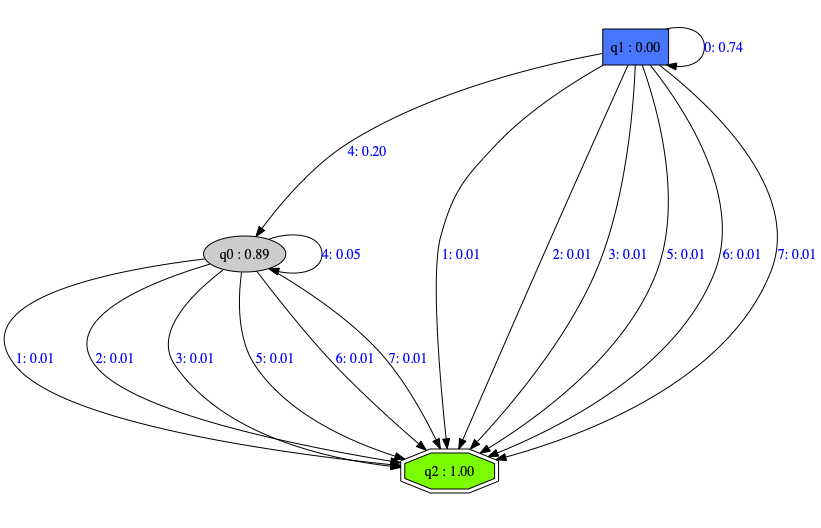

In [5]:
pdfa_model.draw('_'.join([EXPERIMENT_NAME, 'PDFA_model']))

### Computing the Most Probable String (MPS) in the PDFA's Language

In [6]:
model_MPS, model_MPS_prob, _ = pdfa_model.most_probable_string()
print(f'MPS: {model_MPS}\nProbability of MPS in PDFA"s Language: {model_MPS_prob}')


MPS: ['4']
Probability of MPS in PDFA"s Language: 0.17800000000000002


### Sampling from the target PDFA

With the model built, we can sample a trace from it:

In [7]:
(trace, trace_len,
 trace_prob) = pdfa_model.generate_trace(pdfa_model.start_state, N=20)
print("Trace:", trace)
print("Probability of trace in language of the model:", trace_prob)

Trace: ['0', '0', '4']
Probability of trace in language of the model: 0.09747280000000001


### Creating a test / training split

Here, we can generate all of the data for our learning algorithms to use:

In [8]:
num_samples = 5_000
max_trace_length = 30
(traces,
 trace_lengths,
 trace_probs) = pdfa_model.generate_traces(num_samples, N=max_trace_length)

# create a training-test split for model validation after training 
test_size = 0.1
(traces_train, traces_test,
 trace_lengths_train, trace_lengths_test,
 trace_probs_train, trace_probs_test) = train_test_split(traces,
                                                         trace_lengths,
                                                         trace_probs,
                                                         test_size=test_size)

# Write learning data to files for inference
train_data_file = pdfa_model.write_traces_to_file(
    traces_train,
    file=LEARNING_TRAIN_DATA_REL_FILEPATH)
test_data_file = pdfa_model.write_traces_to_file(
    traces_test,
    file=LEARNING_TEST_DATA_REL_FILEPATH)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=16)]: Done 440 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 448 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 456 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 464 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 472 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 480 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 488 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 496 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 504 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 512 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 520 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 528 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 536 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 544 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 560 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Batch computation too fast (0.1292s.) Setting b

[Parallel(n_jobs=16)]: Done 4348 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4353 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4358 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4363 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4368 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4373 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4378 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4383 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4388 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4393 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4398 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4403 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4408 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4413 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 4423 tasks      | elapsed: 

## Learning a PDFA with Flexfringe

Two choices: Using it via Python function calls, or working with the command line.

### Step 1

Install all dependencies and compile flexfringe (development branch due to some technicalities using WIFEXITED macro used for the SAT solver's process)

In [ ]:
# for the C++ code
!apt install graphviz
!apt install libgsl-dev
!apt install libpopt-dev

# for visualization and notebook interface
!pip install graphviz

# Stamina data
!wget http://stamina.chefbe.net/downloads/grid.tar.gz
!tar xfz grid.tar.gz

# cloning the repository
!rm -rf dfasat
!git clone https://bitbucket.org/chrshmmmr/dfasat.git

In [ ]:
# building the repository
# it is important to check out the development branch on colab
!cd dfasat && git checkout  && make clean all

### Step 2 
Import flexfringe tool interface

In [9]:
%autoreload 2

flexfringe = FlexfringeInterface(output_directory=LEARNER_DATA_DIR)

### Step 3

Run grammatical inference using the flexfringe tool with the filename and named arguments just as described in help.

In [10]:
flexfringe.infer_model(get_help=True)

no learning options specified, printing tool help:
welcome, running git commit d1cf04ada0831d0605a3651971ef9a02091d8823 with: dfasat/flexfringe --help  
Usage: flexfringe [OPTIONS]* [input dfa file]
      --version                   Display version information
  -V, --debug=integer             Debug mode and verbosity evel
  -o, --output-dir=string         Relative path for output files with trailing
                                  /, default: "./".
  -h, --heuristic-name=string     Name of the merge heurstic to use; default
                                  count_driven. Use any heuristic in the
                                  evaluation directory. It is often beneficial
                                  to write your own, as heuristics are very
                                  application specific.
  -d, --data-name=string          Name of the merge data class to use; default
                                  count_data. Use any heuristic in the
                                 

welcome, running git commit d1cf04ada0831d0605a3651971ef9a02091d8823 with: dfasat/flexfringe -h=kldistance -d=kl_data -n=10 -x=0 -w=1 -a=1 -b=1 -f=1 -I=0 -t=1 -p=0.2 --output-dir=experiments/flexfringe_test/flexfringe_data/dfa /Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/experiments/flexfringe_test/flexfringe_data/flexfringe_test_train 
sat_program : 
valid: kldistance
aic 1
alergia 1
alergia94 1
conflict_driven 1
conflict_edsm_driven 1
conflict_overlap_driven 1
count_driven 1
depth_driven 1
evidence_driven 1
fixed_depth_mse_error 1
full_overlap_driven 1
kldistance 1
likelihoodratio 1
mealy 1
mse_error 1
overlap4logs 1
overlap_driven 1
process_mining 1
Using heuristic kldistance
Creating apta using evaluation class kl_data
batch mode selected
reading data finished, processing:
dfasat running m99989  x3861  m99993  x40  x41  x37  x37  x45  x41  x187  x161  x178  x172  x166  x183  

found intermediate solut

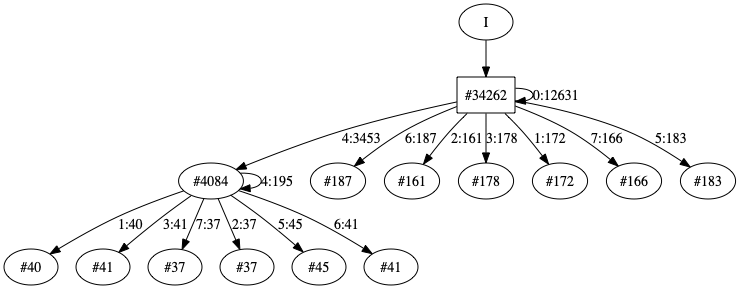

In [11]:
data = flexfringe.infer_model(training_file=train_data_file,
                              h='kldistance',
                              d='kl_data',
                              n='10',
                              x='0',
                              w='1',
                              a='1',
                              b='1',
                              f='1',
                              I='0',
                              t='1',
                              p='0.2')

flexfringe.draw_learned_model()

## Loading Learned Flexfringe Model into Wombats

We first must get the output from flexfringe and convert it into a proper FDFA:

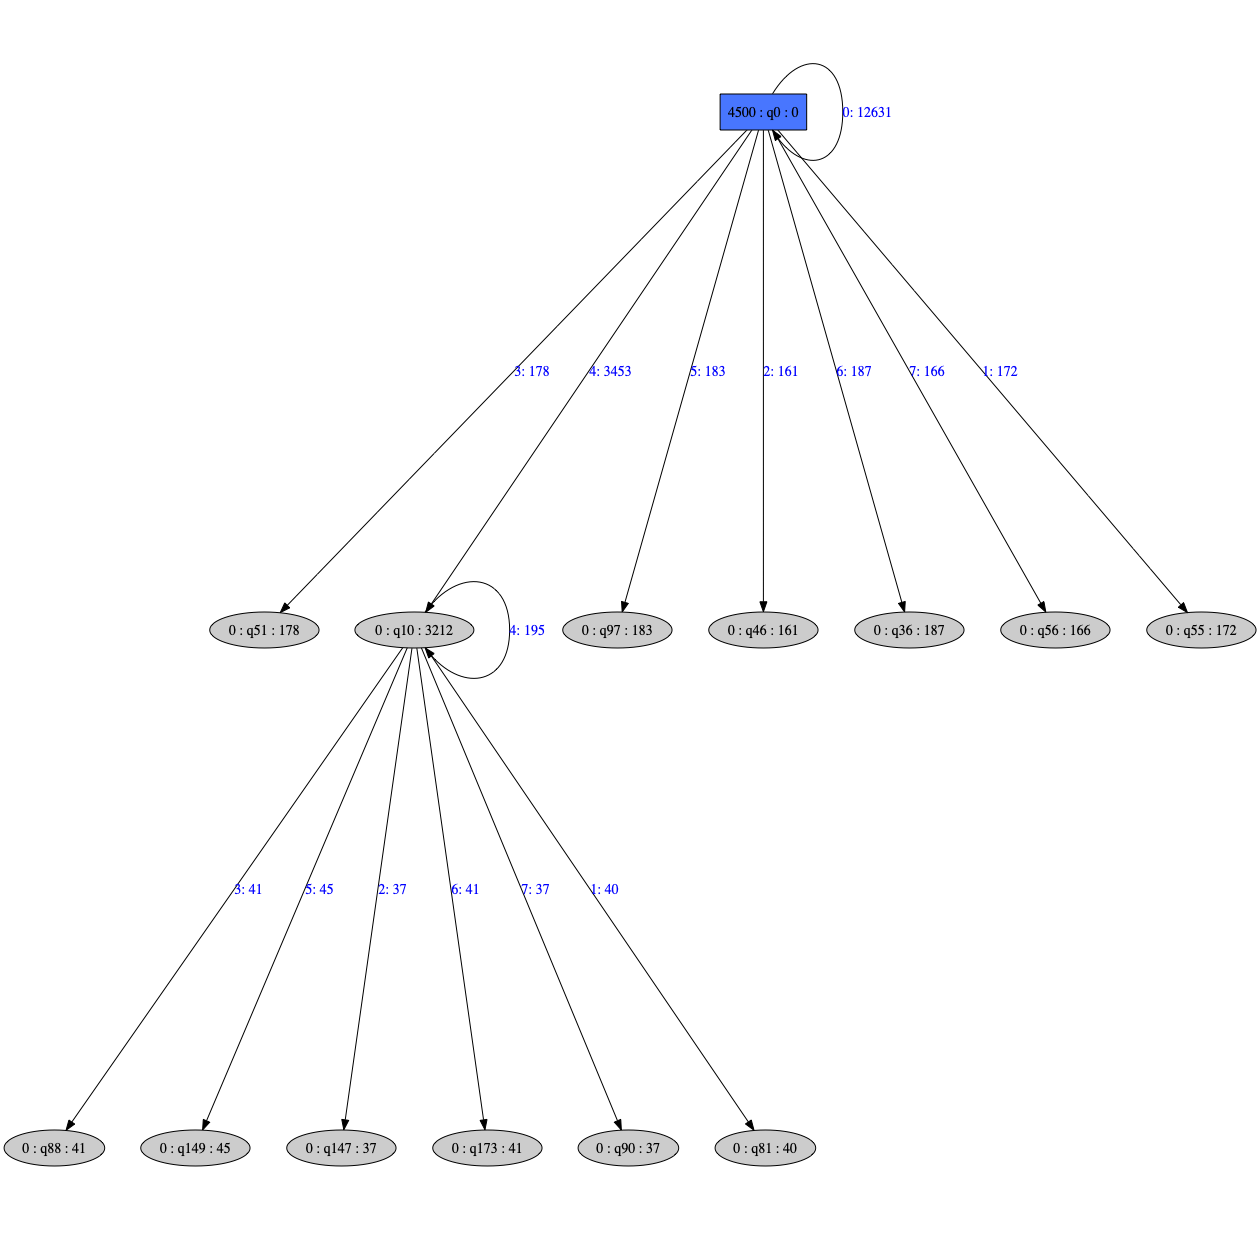

In [12]:
%autoreload 2

learned_fdfa = active_automata.get(automaton_type='FDFA',
                                   graph_data=flexfringe,
                                   graph_data_format='learning_interface')
learned_fdfa.draw('_'.join([EXPERIMENT_NAME, 'learned_FDFA']))

With the FDFA loaded in, we use wombat conversion utilities to convert the FDFA to a PDFA (the same format as our learning target):

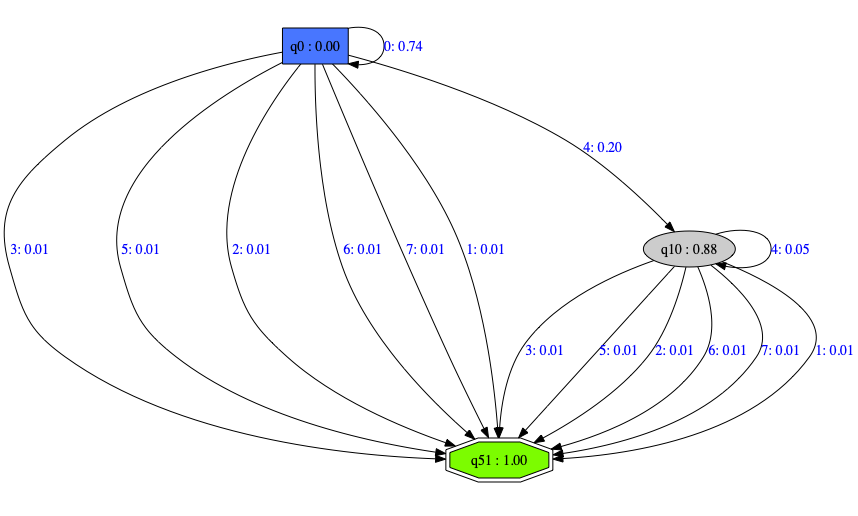

In [13]:
%autoreload 2

learned_pdfa = active_automata.get(automaton_type='PDFA',
                                   graph_data=learned_fdfa,
                                   graph_data_format='fdfa_object',
                                   smooth_transitions=False,
                                   smoothing_amount=0.00001,
                                   merge_sinks=True)
learned_pdfa.draw('_'.join([EXPERIMENT_NAME, 'learned_PDFA']))

MPS of Learned PDFA:

In [14]:
learned_model_MPS, learned_model_MPS_prob, _ = learned_pdfa.most_probable_string()
print(f'Learned MPS: {learned_model_MPS}')
print(f'Probability of MPS in PDFA"s Language: {learned_model_MPS_prob}')


Learned MPS: ['4']
Probability of MPS in PDFA"s Language: 0.17747393153071225


## Analyzing Learning Results with Wombats

Here, we want to use the wombats analysis tools to characterize the learning results

### Initial Model Metrics

Here, we will look at some metrics of the learned model. We begin with data-based approximations to information theoretic quantities that we would have available during training time: cross-entropy, perplexity.

 #### Aside: Ergodic, Stationary Processes

PDFA are stationary ergodic stochastic process models (with [a modification](https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1141&context=scil)).

<br>

***ergodic*: time-ensemble average = state-ensemble average**

*[Example +](https://dsp.stackexchange.com/a/58652):*

An eternal well-balanced dice has \(1 / 6\) probability for each facet \(f,\) each time.
This uniform probability law yields a mean expectation of \(3.5: \sum_{f=1}^{6} \frac{1}{6} \times f .\)
Each time you cast the dice, you get this expectation. Of course, for each throw
you" Ill only get an integer \(1,2,3,4,5,\) or \(6,\) never a decimal like \(3.5 .\) So there is
an apparent mismatch between what you can expect (in probability) and what
you get (actually). A mismatch that relates the (theoretical) probability space
and the (real) time space.
The hypothesis of ergodicity may reconcile the two aspects: it tells you that,
averaging over a sufficient number of trials in time, you can get the same
results as if you were capable of throwing an infinity of dice at the same time.
But remember that it is an hypothesis on processes, and that non-ergodic
phenomena exist.

*[Example -](https://en.wikipedia.org/wiki/Fermi%E2%80%93Pasta%E2%80%93Ulam%E2%80%93Tsingou_problem):*

Fermi–Pasta–Ulam–Tsingou problem: letting a vibrating string go with different initial modes as ICs. Intuition was that as this is very non-linear system would over time exhibit all modes equally. Instead, they got out quasi-periodic behavior.

<img src="pres_figures/Fermi–Pasta–Ulam–Tsingou_recurrence_preview.gif">

<br>

***stationary*: process statistics do not change over time**

*Example +:*
Infinitely flipping a fair coin.

*Example -:*
Infinitely flipping a coin that loses mass from one side every flip.



#### Approximate Cross-Entropy

Here, we are using the Shannon-McMillian-Breiman theorem to define
the cross-entropy of the trace, given that we sampled the trace from
the actual target distribution and we are evaluating it in the PDFA LM (SLP ch3). The definition of cross-entropy of the learned language model (LM) distribution $m$ on target LM distribution $p$ is exactly (eq. 3.48 from SLP ch3)
\(H(p, m)=\lim _{n \rightarrow \infty}-\frac{1}{n} \sum_{W \in L} p\left(w_{1}, \ldots, w_{n}\right) \log m\left(w_{1}, \ldots, w_{n}\right)\)

where a trace is a sequence $W \in L$ s.t. $W = w_{1}, \ldots, w_{n}$. The cross-entropy $H(p,m)$ is an upper bound on the entropy $H(p)$:

$H(p) \leq H(p, m)$

<br>

Then, as a PDFA is a stationary ergodic stochastic process model (with [a modification](https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1141&context=scil)), we can calculate the cross-entropy as (eq. 3.49 from SLP ch3):

\(H(p, m)=\lim _{n \rightarrow \infty}-\frac{1}{n} \log m\left(w_{1} w_{2} \ldots w_{n}\right)\)

<br>

The finite-length approximation to the cross-entropy is then given by (eq. 3.51 from SLP ch3):

\(H(W)=-\frac{1}{N} \log P\left(w_{1} w_{2} \dots w_{N}\right)\)

<br>

*reference: [Speech and Language Processing, 3 ed., Ch3](https://web.stanford.edu/~jurafsky/slp3/3.pdf)*

In [15]:
test_cross_ent, train_cross_ent, target_cross_ent = [], [], []
for trace in traces_test:
    test_cross_ent.append(learned_pdfa.cross_entropy_approx(trace))
    target_cross_ent.append(pdfa_model.cross_entropy_approx(trace))
    
for trace in traces_train:
    train_cross_ent.append(learned_pdfa.cross_entropy_approx(trace))

# averaging over all examples
test_cross_ent = np.mean(test_cross_ent)
train_cross_ent = np.mean(train_cross_ent)
target_cross_ent = np.mean(target_cross_ent)

print(f"Mean Test Approximate Cross-Entropy of Learned Model: {test_cross_ent}")
print(f"Mean Training Approximate Cross-Entropy of Learned Model: {train_cross_ent}")
print(f"Mean Approximate Cross-Entropy of Target Model: {target_cross_ent}")

Mean Test Approximate Cross-Entropy of Learned Model: 1.9411627719892948
Mean Training Approximate Cross-Entropy of Learned Model: 1.9311495766302074
Mean Approximate Cross-Entropy of Target Model: 1.9489946986128073


#### Approximate Perplexity

We can get approximate perplexity directly from approximate cross-entropy (eq. 3.52 SLP):

\(\begin{aligned} \operatorname{Perplexity}(W) &=2^{H(W)} \\ &=P\left(w_{1} w_{2} \ldots w_{N}\right)^{-\frac{1}{N}} \\ &=\sqrt[N]{\frac{1}{P\left(w_{1} w_{2} \ldots w_{N}\right)}} \\ &=\sqrt[N]{\prod_{i=1}^{N} \frac{1}{P\left(w_{i} | w_{1} \ldots w_{i-1}\right)}} \end{aligned}\)

In [16]:
test_perplexity = pow(2, test_cross_ent)
train_perplexity = pow(2, train_cross_ent)
target_perplexity = pow(2, target_cross_ent)
    
print(f"Mean Test Approximate Perplexity of Learned Model: {test_perplexity}")
print(f"Mean Training Approximate Perplexity of Learned Model: {train_perplexity}")
print(f"Mean Approximate Perplexity of Target Model: {target_perplexity}")

Mean Test Approximate Perplexity of Learned Model: 3.840150284461394
Mean Training Approximate Perplexity of Learned Model: 3.8135895483564544
Mean Approximate Perplexity of Target Model: 3.8610539114716924


#### Actual Cross-Entropy and Perplexity

If we have access to the target distribution $p$, we can compute an exact cross-entropy:
\(H(p, m)= -\frac{1}{N} \sum_{W \in S_{test}} p\left(w_{1}, \ldots, w_{n}\right) \log m\left(w_{1}, \ldots, w_{n}\right)\)

and a perplexity:
\begin{aligned}
\textrm{Perplexity}(p, m) &=2^{H(p, m)}
\end{aligned}
over the test set $S_{test}$ on the learned model $m$.


In [17]:
test_cross_ent = learned_pdfa.cross_entropy(traces_test, trace_probs_test)
train_cross_ent = learned_pdfa.cross_entropy(traces_train, trace_probs_train)
target_cross_ent = pdfa_model.cross_entropy(traces_test, trace_probs_test)

print(f"Test Cross-Entropy of Learned Model: {test_cross_ent}")
print(f"Training Cross-Entropy of Learned Model: {train_cross_ent}")
print(f"Cross-Entropy of Target Model: {target_cross_ent}")

Test Cross-Entropy of Learned Model: 0.21493433613496873
Training Cross-Entropy of Learned Model: 0.2092912968571785
Cross-Entropy of Target Model: 0.2153711169879137


perplexity:

In [18]:
test_perplexity = learned_pdfa.perplexity(traces_test, trace_probs_test)
train_perplexity = learned_pdfa.perplexity(traces_train, trace_probs_train)
target_perplexity = pdfa_model.perplexity(traces_test, trace_probs_test)

print(f"Test Perplexity of Learned Model: {test_perplexity}")
print(f"Training Perplexity of Learned Model: {train_perplexity}")
print(f"Perplexity of Target Model: {target_perplexity}")

Test Perplexity of Learned Model: 1.1606510864689081
Training Perplexity of Learned Model: 1.1561201170470077
Perplexity of Target Model: 1.161002530748775


#### Predictive Accuracy

For a less rigorous, but more easily understandable view into the model's performance, we can look at the predictive accuracy of the model.

Here, a prediction from the PDFA takes a sequence of observations, and returns a prediction for the next symbol.

The prediction algorithm can take the form of:
* **sample**: Here
* **argmax**:

In [19]:
print(learned_pdfa.predict(['0', '0', '0'], pred_method=''))

4


In [20]:
print(learned_pdfa.predictive_accuracy(test_traces=traces_test))
print(pdfa_model.predictive_accuracy(test_traces=traces_test))

0.142
0.138
